## Importing dependecies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import os

## Loading the data

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/omkargurav/face-mask-dataset')

Skipping, found downloaded files in "./face-mask-dataset" (use force=True to force download)


In [ ]:
with_mask_files = os.listdir('/content/face-mask-dataset/data/with_mask')

In [ ]:
with_mask_files[0:5]

['with_mask_2991.jpg',
 'with_mask_3341.jpg',
 'with_mask_2784.jpg',
 'with_mask_2560.jpg',
 'with_mask_2701.jpg']

In [ ]:
without_mask_files = os.listdir('/content/face-mask-dataset/data/without_mask')

In [ ]:
without_mask_files[0:5]

['without_mask_3165.jpg',
 'without_mask_3260.jpg',
 'without_mask_3229.jpg',
 'without_mask_1726.jpg',
 'without_mask_475.jpg']

In [ ]:
print('Number of with mask images:' ,len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


## Creating Labels for both classes
### with mask --> 1
### without mask --> 2

In [ ]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [ ]:
labels  = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])
print(labels[3722:3730])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0]


Image plotting

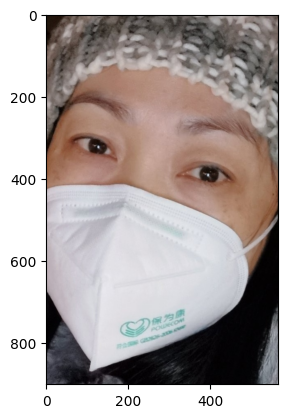

In [ ]:
img = mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_101.jpg')
imgplot = plt.imshow(img)
plt.show()

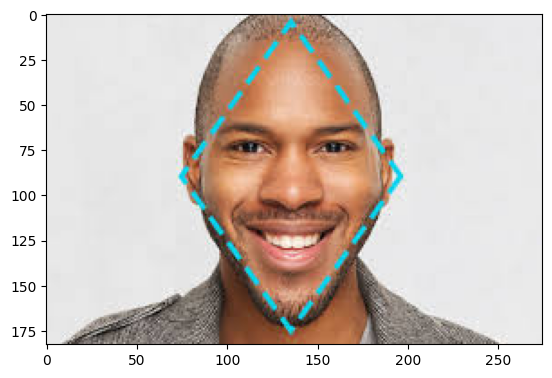

In [ ]:
img = mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_1008.jpg')
implot = plt.imshow(img)
plt.show()

### Image processing
1. Resize the images
2. Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/face-mask-dataset/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(data)

list

In [ ]:
## converting data and labels into numpy array
X = np.array(data)
y = np.array(labels)

In [ ]:
print(X.shape, y.shape , sep='\n')

(7553, 128, 128, 3)
(7553,)


Splitting the data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, sep='\n')

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)


Normalizing the images between 0 - 1

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [ ]:
X_train_scaled[0][0]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

Building a Convolution Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['acc'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 20s 23ms/step - loss: 0.4441 - acc: 0.8076 - val_loss: 0.2490 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2845 - acc: 0.8900 - val_loss: 0.2794 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2229 - acc: 0.9137 - val_loss: 0.2430 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1851 - acc: 0.9307 - val_loss: 0.1882 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1609 - acc: 0.9399 - val_loss: 0.2359 - val_acc: 0.9157


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
accuracy

48/48 [==============================] - 0s 9ms/step - loss: 0.2282 - acc: 0.9279


0.9278623461723328

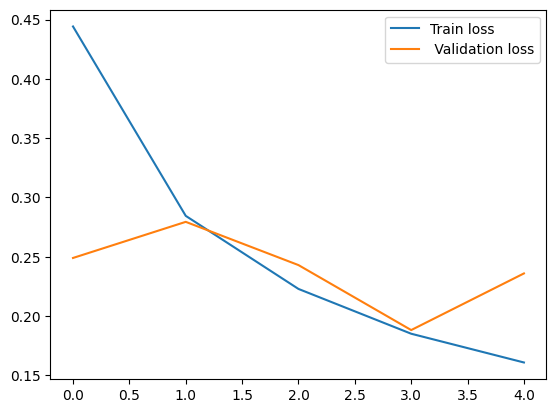

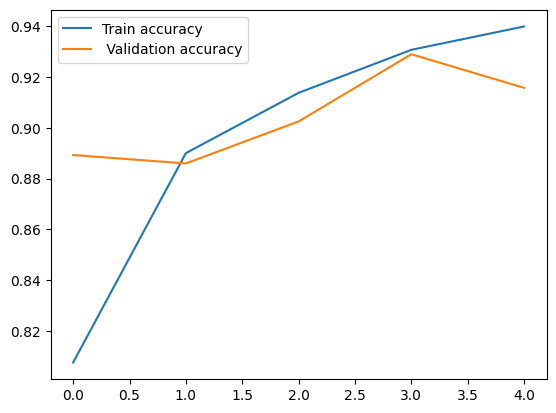

In [ ]:
h = history

plt.plot(h.history['loss'], label = 'Train loss')
plt.plot(h.history['val_loss'], label = ' Validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'Train accuracy')
plt.plot(h.history['val_acc'], label = ' Validation accuracy')
plt.legend()
plt.show()

### Predictive system

Input image/content/images.jpeg


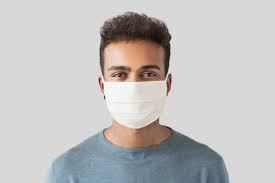

1/1 [==============================] - 0s 169ms/step
[[0.41924676 0.52338177]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Input image')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not waering a mask')
